## Day 25 Lecture 2 Assignment

In this assignment, we will extend a previous binary model to a multinomial case with three classes. We will use the FIFA soccer ratings dataset loaded below and analyze the model generated for this dataset.

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

In [2]:
def remove_correlated_features(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [3]:
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [4]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


Our response for our logistic regression model is going to be a new column, "RankingTier", that contains three categories:

- High: Overall score > 75
- Middle: Overall score between 65 and 75
- Low: Overall score < 65

In [5]:
bin = [0,65,75,99]
category = pd.cut(soccer_data.Overall,bin, labels=['Low','Middle','High']) 
category = category.to_frame()
category.columns = ['RankingTier']
df_new = pd.concat([soccer_data,category],axis = 1)

In [6]:
df_new

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,RankingTier
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,48,22,94,94,75,96,33,28,26,High
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,63,29,95,82,85,95,28,31,23,High
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,56,36,89,87,81,94,27,24,33,High
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,76,61,87,94,79,88,68,58,51,High
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,54,41,87,89,86,91,34,27,22,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,238813,J. Lundstram,47,34,38,40,49,25,42,30,...,46,46,39,52,43,45,40,48,47,Low
16118,243165,N. Christoffersson,47,23,52,52,43,36,39,32,...,47,16,46,33,43,42,22,15,19,Low
16119,241638,B. Worman,47,25,40,46,38,38,45,38,...,32,15,48,43,55,41,32,13,11,Low
16120,246268,D. Walker-Rice,47,44,50,39,42,40,51,34,...,33,22,44,47,50,46,20,25,27,Low


The next few steps until model training are the same as before: identify and remove highly correlated features, and split the data into a training set (80%) and a test set (20%).

In [7]:
def remove_correlated_features(dataset, threshold=0.9):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [8]:
remove_correlated_features(df_new)

Deleted StandingTackle from dataset.
Deleted SlidingTackle from dataset.


,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,RankingTier
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,59,94,48,22,94,94,75,96,33,High
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,79,93,63,29,95,82,85,95,28,High
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,49,82,56,36,89,87,81,94,27,High
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,75,91,76,61,87,94,79,88,68,High
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,66,80,54,41,87,89,86,91,34,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,238813,J. Lundstram,47,34,38,40,49,25,42,30,...,47,38,46,46,39,52,43,45,40,Low
16118,243165,N. Christoffersson,47,23,52,52,43,36,39,32,...,67,42,47,16,46,33,43,42,22,Low
16119,241638,B. Worman,47,25,40,46,38,38,45,38,...,32,45,32,15,48,43,55,41,32,Low
16120,246268,D. Walker-Rice,47,44,50,39,42,40,51,34,...,48,34,33,22,44,47,50,46,20,Low


In [9]:
df_new['RankingTier'].value_counts()

Middle    7597
Low       7110
High      1415
Name: RankingTier, dtype: int64

In [10]:
X = df_new.drop(['ID','Name','Overall','RankingTier'], axis=1)
Y = df_new['RankingTier']

In [11]:
Y.value_counts()

Middle    7597
Low       7110
High      1415
Name: RankingTier, dtype: int64

Fit a multinomial logistic regression model (it's a different model than the binary one) using the statsmodels package and print out the coefficient summary. What is the "reference" tier chosen by the model? How do we interpret the coefficients - for example, how does the intepretation of the "Reactions" coefficient for RankingTier=Low differ from the "Reactions" coefficient for RankingTier=Middle?

In [12]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
from statsmodels.discrete.discrete_model import MNLogit

In [14]:
model1 = MNLogit(Y_train, X_train)
nmodel = model1.fit()

Optimization terminated successfully.
         Current function value: 0.663061
         Iterations 8


In [15]:
print(nmodel.summary())

                          MNLogit Regression Results                          
Dep. Variable:            RankingTier   No. Observations:                12897
Model:                        MNLogit   Df Residuals:                    12843
Method:                           MLE   Df Model:                           52
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                  0.2865
Time:                        09:36:05   Log-Likelihood:                -8551.5
converged:                       True   LL-Null:                       -11986.
Covariance Type:            nonrobust   LLR p-value:                     0.000
RankingTier=Middle       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Crossing               0.0240      0.003      8.340      0.000       0.018       0.030
Finishing              0.0049      0.004      1.349      0.177      -0.002       0.012
HeadingAccuracy     

>*There is a limitation in the .summary() function of statsmodels- we cannot see all categories in the target variable. Since we are only seeing Middle and High for **RankingTier**, we will be comparing their Reactions coefficient instead.*

For *Middle*, we have a coefficient of 0.0798 and 0.1832 for *High*. Since we have double the coefficient for 'Reactions' on *High*, it definitely is the make-or-break feature to be a top player.

To evaluate test error using cross-validation, we will switch back to scikit-learn. Estimate the test error of this multinomial logistic regression model using 10-fold CV.

Note: scikit-learn's LogisticRegression() function can handle both binary and multinomial regression, and it is automatically able to determine which is appropriate based on the y_train array that is passed. You should be able to reuse previous code with minimal changes required.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [17]:
cv_test = cross_val_score(LogisticRegression(solver='liblinear'), X_train, Y_train, cv=10)
print('\n--Train Data--')
print('Mean: {:.5f} Std: {:.4f}\n{}'.format(cv_test.mean(), cv_test.std(), cv_test))

cv_test = cross_val_score(LogisticRegression(solver='liblinear'), x_test, y_test, cv=10)
print('\n--Test Data--')
print('Mean: {:.5f} Std: {:.4f}\n{}'.format(cv_test.mean(), cv_test.std(), cv_test))


--Train Data--
Mean: 0.79732 Std: 0.0075
[0.80310078 0.79069767 0.79612403 0.7875969  0.79069767 0.78992248
 0.80697674 0.79906905 0.79751746 0.81148177]

--Test Data--
Mean: 0.77148 Std: 0.0154
[0.75851393 0.76470588 0.79566563 0.74303406 0.78637771 0.77950311
 0.77329193 0.75465839 0.78571429 0.77329193]


As we did in the previous exercise, train a multinomial logistic regression on the training data, make predictions on the 20% holdout test data, then:

- Determine the precision, recall, and F1-score of our model using a cutoff/threshold of 0.5 (hint: scikit-learn's *classification_report* function may be helpful)
- Plot or otherwise generate a confusion matrix
- Plot the ROC curve for our logistic regression model

Comment on the performance of the model.

In [18]:
logit = LogisticRegression(solver='liblinear')
logit.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [19]:
train_prob = logit.predict_proba(X_train)
test_prob = logit.predict_proba(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
results = logit.predict(x_test)

In [21]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, results, labels=['Low', 'Middle', 'High']),
    index=['true:Low', 'true:Middle', 'true:High'],
    columns=['pred:Low', 'pred:Middle', 'pred:High']
)
print(cmtx)

             pred:Low  pred:Middle  pred:High
true:Low         1229          204          0
true:Middle       230         1280          1
true:High           0          222         59


In [27]:
train_pred = logit.predict(X_train)
print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

        High       0.94      0.20      0.32      1134
         Low       0.85      0.87      0.86      5677
      Middle       0.76      0.85      0.80      6086

    accuracy                           0.80     12897
   macro avg       0.85      0.64      0.66     12897
weighted avg       0.81      0.80      0.78     12897



In [28]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

In [29]:
Y_bin = pd.get_dummies(y_test)
Y_pred_prob = logit.predict_proba(x_test)
logit.classes_

array(['High', 'Low', 'Middle'], dtype=object)

In [31]:
Y_bin

,Low,Middle,High
10826,1,0,0
12356,1,0,0
676,0,0,1
6422,0,1,0
7771,0,1,0
...,...,...,...
9311,1,0,0
15453,1,0,0
6303,0,1,0
6491,0,1,0


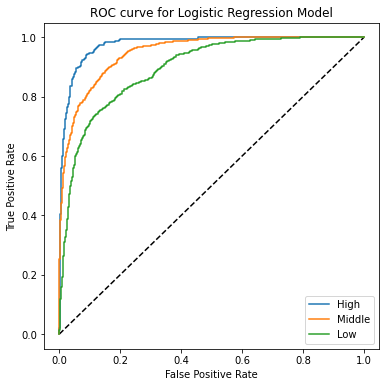

In [30]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
fpr1, tpr1, thresholds = roc_curve(Y_bin['High'], Y_pred_prob[:,0])
line0, = plt.plot(fpr1, tpr1, label='High')

fpr2, tpr2, thresholds = roc_curve(Y_bin['Low'], Y_pred_prob[:,1])
line1, = plt.plot(fpr2, tpr2, label='Middle')

fpr3, tpr3, thresholds = roc_curve(Y_bin['Middle'], Y_pred_prob[:,2])
line2, = plt.plot(fpr3, tpr3, label='Low')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()